In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv

# Loading the data from the CSV file
data = pd.read_csv('train_2_3.csv')
test_data = pd.read_csv('test_2_3.csv')
#as the data is shuffled we are taking 20% of the train data as validation data
tdata = data

class naive_bayes: 
    def __init__(self,dat):
        self.data = dat.values

        col3 = dat[dat.columns[2]]
        classes = col3.tolist()

        cset = set(classes)

        self.clist = list(cset)
        self.classnum=len(cset)

        dfs=[]
        for i in cset:
          dfs.append(dat[dat["label"]==i])

        xs=[]
        ys=[]
        for i in range(0,self.classnum):
          col1=dfs[i][dfs[i].columns[0]]
          col2=dfs[i][dfs[i].columns[1]]

          xs.append(col1.tolist())
          ys.append(col2.tolist())

        covariance=np.zeros((2,2))
        covariance[0][0]=1
        covariance[1][1]=1

        inverse=np.linalg.inv(covariance)

        meanx=[]
        meany=[]

        for i in range(0,self.classnum):
          meanx.append(np.average(xs[i]))
          meany.append(np.average(ys[i]))

        den=2*math.pi*(math.sqrt(np.linalg.det(covariance)))

        meanmatrices=[]

        for i in range(0,self.classnum):
          mean=np.zeros((2,1))

          mean[0][0]=meanx[i]
          mean[1][0]=meany[i]

          meanmatrices.append(mean)

        self.dfs=dfs
        self.xs=xs
        self.ys=ys
        self.den=den
        self.covariance=covariance
        self.inverse=inverse
        self.meanmatrices=meanmatrices

    def predict(self,point):
        # print(l)
        x = point[0]
        y = point[1]

        pointmatrix=np.zeros((2,1))

        pointmatrix[0][0]=x
        pointmatrix[1][0]=y

        p=[]

        for j in range(0,self.classnum):
          a=np.subtract(pointmatrix,self.meanmatrices[j])
          at=np.transpose(a)
          b=np.dot(at,self.inverse)
          c=np.dot(b,a)
          num=math.exp(-0.5*c[0][0])

          p.append(num/self.den)

        return self.clist[p.index(max(p))]
        
    def train_error(self):
        count = 0
        for i in range(len(self.data)):
            if self.predict([self.data[i][0],self.data[i][1]]) != self.data[i][2]:
                count+=1
        return count/len(self.data)

    def test_error(self,l):
        count = 0
        for i in range(len(l)):
            # if i==0:
            #     print(l[i][0],l[i][1],l[i][2])
            if self.predict([l[i][0],l[i][1]]) != l[i][2]:
                count+=1
        return count/len(l)

    def predict_list(self,l):
        ans = []
        for i in l:
            # print(i)
            ans.append(self.predict(i))
        return ans



Train Data Accuracy = 77.8%

Test Data Accuracy = 78.0%



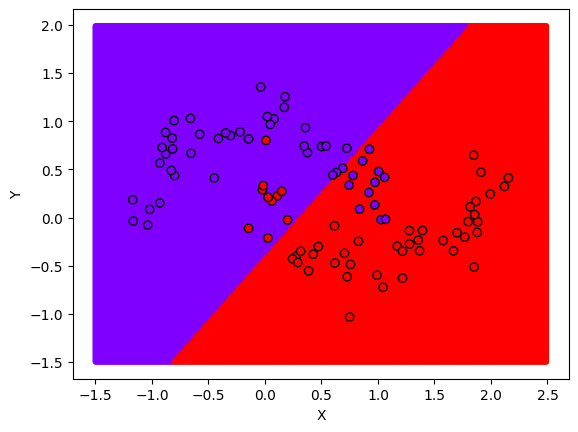

In [24]:
predictor = naive_bayes(dat=tdata)

l= []
for i in range(-150,250):
    for j in range(-150,200):
        l.append([i/100,j/100])

new_points = np.array(l)
trainerror = predictor.train_error()
testerror = predictor.test_error(test_data.values)
predictions = predictor.predict_list(l)

print("\nTrain Data Accuracy = ",100-trainerror*100,"%\n",sep="")
print("Test Data Accuracy = ",100-testerror*100,"%\n",sep="")


X = test_data[['x', 'y']].values
y = test_data['label'].values
plt.scatter(new_points[:, 0], new_points[:, 1], c=predictions, marker='.', cmap='rainbow')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow',marker = 'o', edgecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [25]:
#defining the funciton to calculate the confusion matrix

def confusion_matrix(y_true, y_pred):
    matrix = np.zeros((2, 2))
    for i in range(len(y_true)):
        actual = int(y_true[i])
        predicted = int(y_pred[i])
        # print(actual,predicted)
        matrix[actual][predicted] += 1
    return matrix

In [26]:
#calculating the confusion matrix for train and test data and printing them
train_pred = predictor.predict_list(tdata.values[:,:2])
test_pred = predictor.predict_list(test_data.values[:,:2])

train_confusion = confusion_matrix(tdata.values[:,2], train_pred)
test_confusion = confusion_matrix(test_data.values[:,2], test_pred)

print("Train Confusion Matrix for train data is")
print(train_confusion)
print()

print("Test Confusion Matrix for test data is")
print(test_confusion)


Train Confusion Matrix for train data is
[[193.  57.]
 [ 54. 196.]]

Test Confusion Matrix for test data is
[[38. 12.]
 [10. 40.]]
